In [28]:
#Source : 파이썬을 활용한 금융공학 레시피 by 김용환, 일부 수정
import pandas as pd
import datetime as dt
import bs4
from urllib.request import urlopen
import matplotlib.pyplot as plt
%matplotlib inline


def date_format(d):
    d = str(d).replace('-', '.')
    yyyy=int(d.split('.')[0])
    mm=int(d.split('.')[1])
    dd=int(d.split('.')[2])
    
    this_date = dt.date(yyyy,mm,dd)
    return this_date


def historical_index_naver_date(index_cd, start_date='', end_date='', page_n=1, last_page=0):
    if start_date:
        start_date=date_format(start_date)
    else: 
        start_date = dt.date.today()
    if end_date : 
        end_date=date_format(end_date)
    else:
            end_date=dt.date.today()
    
    naver_index = 'https://finance.naver.com/sise/sise_index_day.nhn?code=' + index_cd + '&page=' + str(page_n) 
    source = urlopen(naver_index).read()
    source = bs4.BeautifulSoup(source, 'lxml') 
    
    dates=source.find_all('td',class_='date') #<td class ="date">
    prices=source.find_all('td', class_='number_1') #<td class = "number_1">
    
    for n in range(len(dates)): 
        if dates[n].text.split('.')[0].isdigit():
            this_date = dates[n].text
            this_date = date_format(this_date)
            
            if this_date <= end_date and this_date >= start_date:
                this_close=prices[n*4+1].text
                this_close=this_close.replace('%', '') 
                this_close=float(this_close)
                this_close
    
                historical_prices_date[this_date] = this_close
            
            elif this_date < start_date:
                return historical_prices_date
    
    if last_page ==0:
        last_page = source.find('td',class_='pgRR').find('a')['href']
        last_page = last_page.split('&')[1]
        last_page = last_page.split('=')[1]
        last_page=int(last_page)
    
    if page_n < last_page:
        page_n = page_n +1
        historical_index_naver_date(index_cd, start_date, end_date, page_n, last_page)
    
    return historical_prices_date

historical_prices_date = dict()
historical_prices_date = historical_index_naver_date('KOSPI', '2010.08.01', '2020.08.10')

In [29]:
tmp = dict()
tmp['KOSPI return(%)'] = historical_prices_date
df = pd.DataFrame(tmp)
df.head()

,KOSPI return(%)
2010-08-02,1.30
2010-08-03,0.47
2010-08-04,-0.07
2010-08-05,-0.30
2010-08-06,-0.00


Text(0.5, 0, 'KOSPI return')

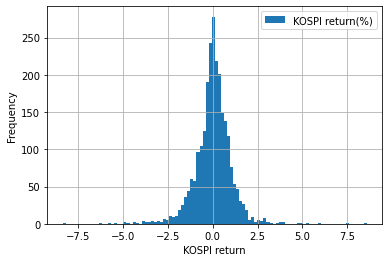

In [34]:
# Historgram on Kospi returns in recent 11 years
df.plot.hist(bins=100, grid=True)
plt.xlabel('KOSPI return')

Text(0.5, 0, 'KOSPI return')

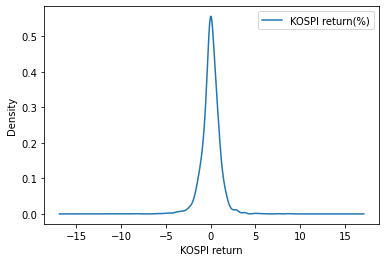

In [36]:
# Non-paramatic estimation on Distribution of Kospi returns
df.plot.kde()
plt.xlabel('KOSPI return')

<function matplotlib.pyplot.show(*args, **kw)>

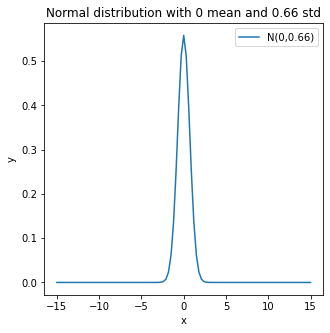

In [51]:
# Kospi density function estimated through non-paramatic estimation takes after normal desity function with 0 mean and 1.4 std
import numpy as np
x = np.linspace(-15,15,101)
y = (1 / np.sqrt(2 * np.pi)*1.4) * np.exp(-x**2/2*1.4**2)
plt.figure(figsize=(5,5))
plt.plot(x,y)
plt.title("Normal distribution with 0 mean and 1.4 std")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["N(0,1.4)"])
plt.show